# About Dataset

# Supervised Learning Capstone Project (Telcom Customer Churn)

# Context

# "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

# About this file
# Telcom Customer Churn

# Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

# The raw data contains 7032 rows (customers) and 21 columns (features).

# The “Churn” column is our target.

## GOAL: Create a model to predict whether or not a customer will Churn.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv('telecom data ml/31389400-Telco-Customer-Churn.csv')

In [163]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [168]:
# Here most of the features are categorical we can convert them into numerical later. 

In [166]:
df.shape

(7032, 21)

In [170]:
# Statistical Analysis.

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
# Exploratory data analysis

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
# Display the balance of the class labels(churn) with a countplot

In [19]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

In [20]:
df.Churn.value_counts() # imbalance data

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

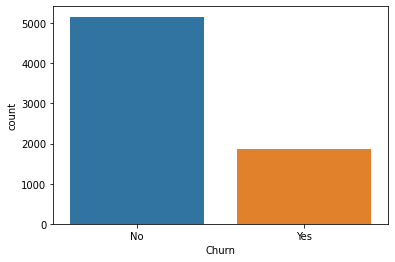

In [21]:
sns.countplot(x = 'Churn', data = df)

In [22]:
# Explore the distribution of totalcharges b/w churn categories with a box plot or violin plot

In [23]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7027    1990.50
7028    7362.90
7029     346.45
7030     306.60
7031    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [24]:
df.TotalCharges.nlargest(5)

4602    8684.80
4578    8672.45
6757    8670.10
5338    8594.40
2182    8564.75
Name: TotalCharges, dtype: float64

In [25]:
df.TotalCharges.value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

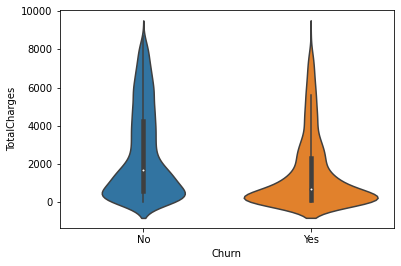

In [26]:
sns.violinplot(x = 'Churn',  y = 'TotalCharges',data = df )

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

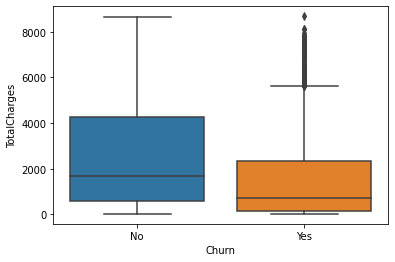

In [27]:
sns.boxplot(x = 'Churn',  y = 'TotalCharges',data = df)

In [28]:
# create a boxplot showing the distribution of total charges per contract types , also add in a hue coloring based on the churn class

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df.Contract

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: object

In [31]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [32]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

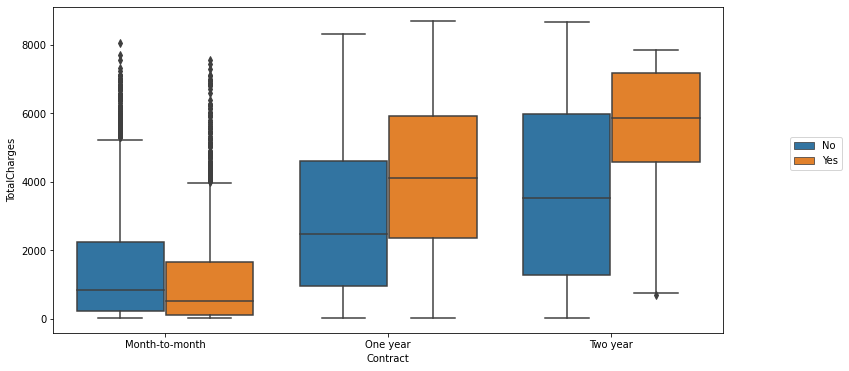

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Contract', y = 'TotalCharges', hue = 'Churn', data = df)
plt.legend(loc = (1.1, 0.5))

In [34]:
# create a bar plot showing the correlation of the following features to the class label. 
# for the categorical features you will need to convert them to dummy variables first.

In [35]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [37]:
# Now find correlation for converted numerical values

In [38]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]).corr()

In [39]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [40]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

In [41]:
corr_yes_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

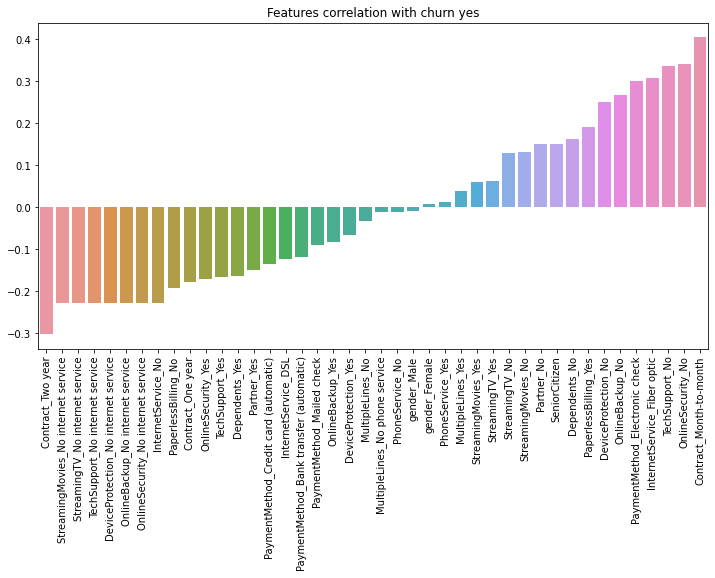

In [42]:
plt.figure(figsize=(12,6))
plt.title('Features correlation with churn yes')
sns.barplot(x = corr_yes_churn.index, y = corr_yes_churn.values)
plt.xticks(rotation = 90);

# Churn analysis

# Churn analysis focuses on segmenting customers based on their tenure, creating 'cohorts, allowing us to examine diffference b/w customer cohort segments'

 # 3 contract types available?

In [43]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [44]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [46]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [47]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [48]:
#create a distribution of tenure column, which is the amount of months a customer was or has been on a customer

<AxesSubplot:xlabel='tenure', ylabel='Count'>

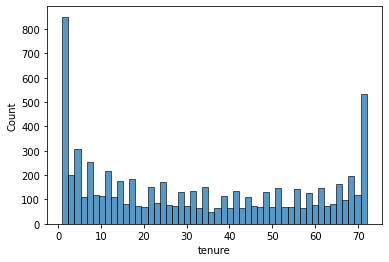

In [49]:
sns.histplot(data = df, x = 'tenure', bins = 50)

In [50]:
# Lets plot histograms separated by two additional features, churn and contract

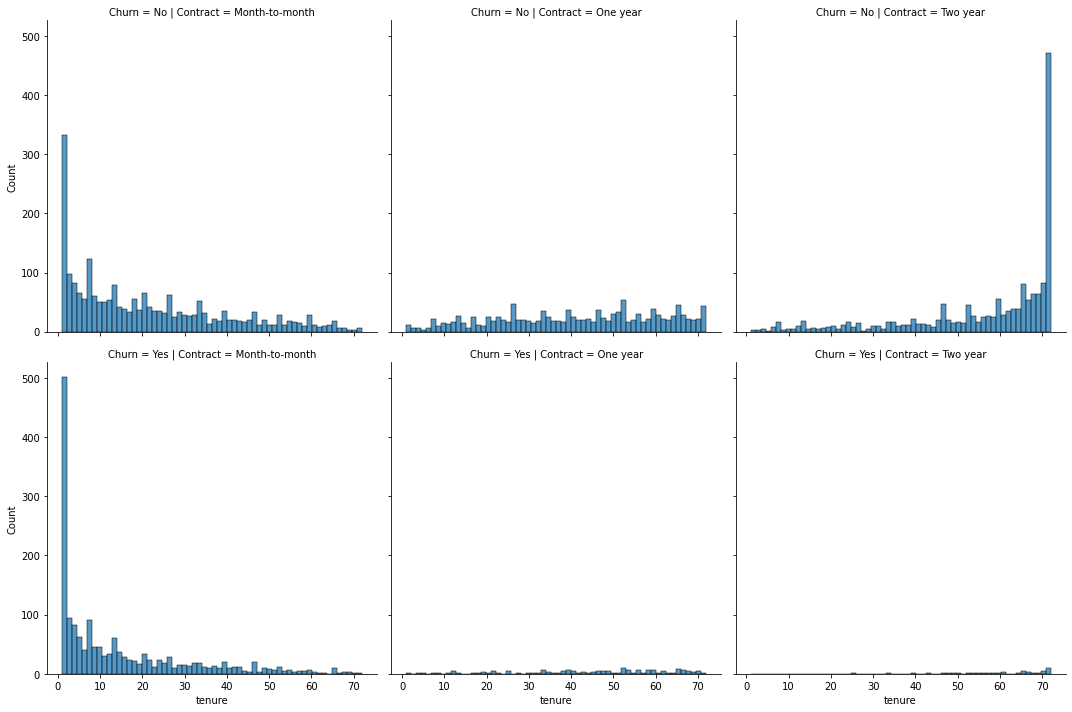

In [51]:
sns.displot(data = df, x = 'tenure', bins = 60, col = 'Contract', row = 'Churn')

In [52]:
# Lets plot scatterplot for Total charges vs monthly charges and color hue by churn

In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

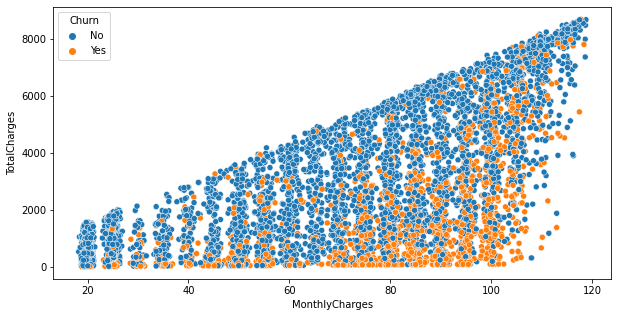

In [54]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', data =df)

In [55]:
# creating cohorts baseed on tenure

In [56]:
# Lets begin by treating each unique tenure length, 1 month, 2 momth, 3 month....N months as its own cohort.

In [57]:
# calculate the churn rate(percentage that had yes churn)

In [58]:
Yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [59]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [60]:
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [61]:
churn_rate = Yes_churn/(no_churn+Yes_churn)*100

In [62]:
churn_rate 

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [63]:
churn_rate.transpose()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
tenure,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


<AxesSubplot:xlabel='tenure'>

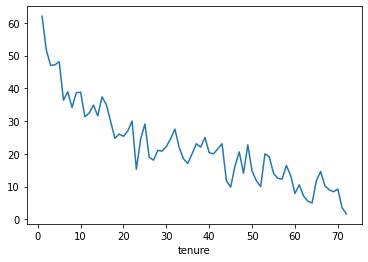

In [64]:
churn_rate.transpose()['customerID'].plot()

In [65]:
# Broder cohort groups

# Based on the tenture columns values , create a new column called Tenure cohort that creates 4 separate categories

In [66]:
df.tenure

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [67]:
def cohort(tenure):
    if tenure<13:
        return '0-12 months'
    elif tenure < 25:
        return '12-24 months'
    elif tenure < 49:
        return '24 - 48 months'
    else:
        return 'over 48 months'

In [68]:
df['Tenure cohort'] = df['tenure'].apply(cohort)

In [69]:
df[[ 'tenure','Tenure cohort']]

,tenure,Tenure cohort
0,1,0-12 months
1,34,24 - 48 months
2,2,0-12 months
3,45,24 - 48 months
4,2,0-12 months
...,...,...
7027,24,12-24 months
7028,72,over 48 months
7029,11,0-12 months
7030,4,0-12 months


In [70]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24 - 48 months


In [171]:
# Lets plot scatterplot for Total charges vs monthly charges and color hue by Tenure cohort

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

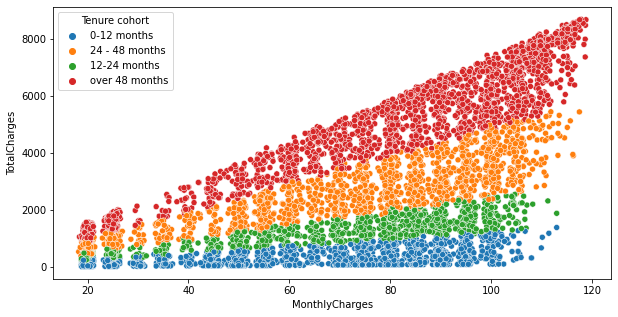

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Tenure cohort', data =df)

In [73]:
# create a countplot showing the churn count per tenure cohort

<AxesSubplot:xlabel='Tenure cohort', ylabel='count'>

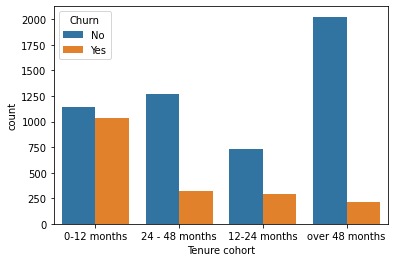

In [74]:
sns.countplot(x = 'Tenure cohort',hue = 'Churn',data = df)

In [75]:
# create a grid of countplots showing countds per tenure cohort,wrt to contract type & colored by the churn hue

In [76]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [77]:
df['Tenure cohort'].unique()

array(['0-12 months', '24 - 48 months', '12-24 months', 'over 48 months'],
      dtype=object)

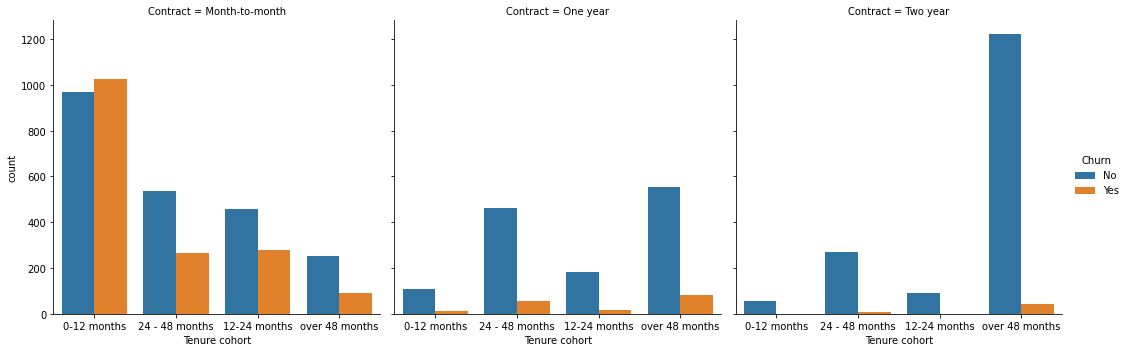

In [78]:
sns.catplot(data = df, x = 'Tenure cohort', hue = 'Churn',kind = 'count',col = 'Contract')

# Machine learning

In [80]:
# Lets explore 4 different based methods: A single deision Tree, Random forest, Adaboost, Gradient boosting.

In [81]:
# Single Decision Tree

In [82]:
# create x independant features & y dependant features(features & labels)

In [83]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24 - 48 months


In [84]:
X = df.drop(['Churn', 'customerID'],axis = 1)

In [85]:
X = pd.get_dummies(X,drop_first=True)

In [86]:
y = df['Churn']

In [87]:
# Train test split

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.1,random_state=101)

# Decision Tree model

In [89]:
from sklearn.tree import DecisionTreeClassifier 

In [90]:
model_dt  = DecisionTreeClassifier(max_depth = 6)

In [91]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [92]:
# performance metrics

In [93]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [94]:
y_predict = model_dt.predict(X_test)
class_report = classification_report(y_predict, y_test)

In [95]:
print(class_report)

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       572
         Yes       0.49      0.55      0.52       132

    accuracy                           0.81       704
   macro avg       0.69      0.71      0.70       704
weighted avg       0.82      0.81      0.81       704



C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


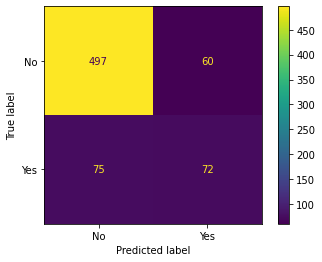

In [96]:
plot_confusion_matrix(model_dt,X_test, y_test)

In [97]:
# calculate the feature importance of decision tree

In [98]:
model_dt.feature_importances_

array([0.01082504, 0.42391407, 0.04611481, 0.06416831, 0.00123697,
       0.        , 0.        , 0.00088963, 0.00696195, 0.01243191,
       0.31406016, 0.        , 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.02628952, 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [99]:
imp_fea = pd.DataFrame(model_dt.feature_importances_, index = X.columns,columns = ['feature_Important'])

In [100]:
imp_fea

,feature_Important
SeniorCitizen,0.010825
tenure,0.423914
MonthlyCharges,0.046115
TotalCharges,0.064168
gender_Male,0.001237
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.000890
MultipleLines_No phone service,0.006962
MultipleLines_Yes,0.012432


In [101]:
imp_fea = imp_fea.sort_values('feature_Important')

In [102]:
imp_fea

,feature_Important
DeviceProtection_No internet service,0.000000
Tenure cohort_12-24 months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000


In [103]:
imp_fea =imp_fea[imp_fea['feature_Important']>0]

In [104]:
imp_fea

,feature_Important
PhoneService_Yes,0.000890
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.006962
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
StreamingTV_No internet service,0.026290


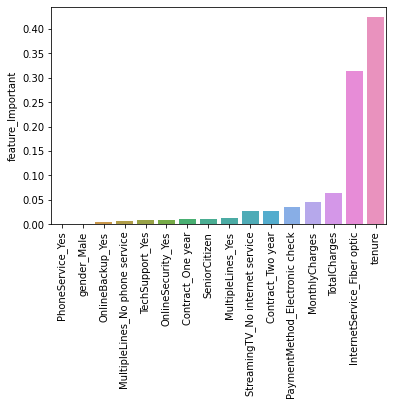

In [105]:
sns.barplot(data = imp_fea, x = imp_fea.index, y ='feature_Important' )
plt.xticks(rotation = 90);

In [106]:
# Random forest algorithm

In [107]:
# Task - Create a Random forest model and create a classification report, confusion matrix.

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
model_rf = RandomForestClassifier(max_depth=6)

In [127]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [128]:
# predict model

In [129]:
rf_pred = model_rf.predict(X_test)

In [130]:
# performace metric of model

In [131]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [132]:
class_report = classification_report(y_test, rf_pred)

In [133]:
print(class_report)

              precision    recall  f1-score   support

          No       0.86      0.93      0.89       557
         Yes       0.61      0.43      0.50       147

    accuracy                           0.82       704
   macro avg       0.74      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



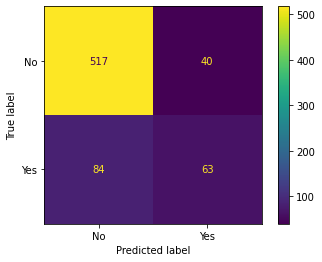

In [135]:
plot_confusion_matrix(model_rf,X_test, y_test )

# BOOSTED TREES

In [137]:
# Lets  use Adaboost or Gradient Boosting to create a model and back the classificaton report & plot a confusion matrix for its predicted results

In [139]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [140]:
model_ada = AdaBoostClassifier()

In [141]:
model_gb = GradientBoostingClassifier()

In [143]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier()

In [148]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [144]:
ada_pred = model_ada.predict(X_test)

In [145]:
ada_pred

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'N

In [149]:
gb_pred = model_gb.predict(X_test)

In [150]:
gb_pred

array(['Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'N

In [146]:
ada_cr = classification_report(y_test, ada_pred)

In [151]:
gb_cr = classification_report(y_test, gb_pred)

In [153]:
print(ada_cr)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [152]:
print(gb_cr)

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


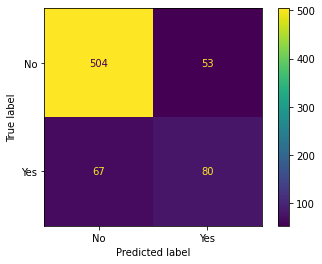

In [154]:
plot_confusion_matrix(model_ada,X_test,y_test)

C:\Users\240G_up\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


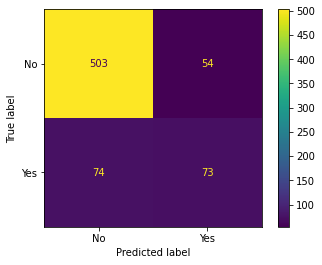

In [157]:
plot_confusion_matrix(model_gb, X_test,y_test)

# Conclusion

# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.